In [7]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [8]:
import math
import time

In [9]:
df_3.shape
df_3.head()

NameError: name 'df_3' is not defined

In [12]:
#import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
print(df_ano1.iloc[:,3].dtype)
plt.plot(df_1.iloc[:,0].values,df_1.iloc[:,6].values, linewidth=0.5)

NameError: name 'df_ano1' is not defined

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

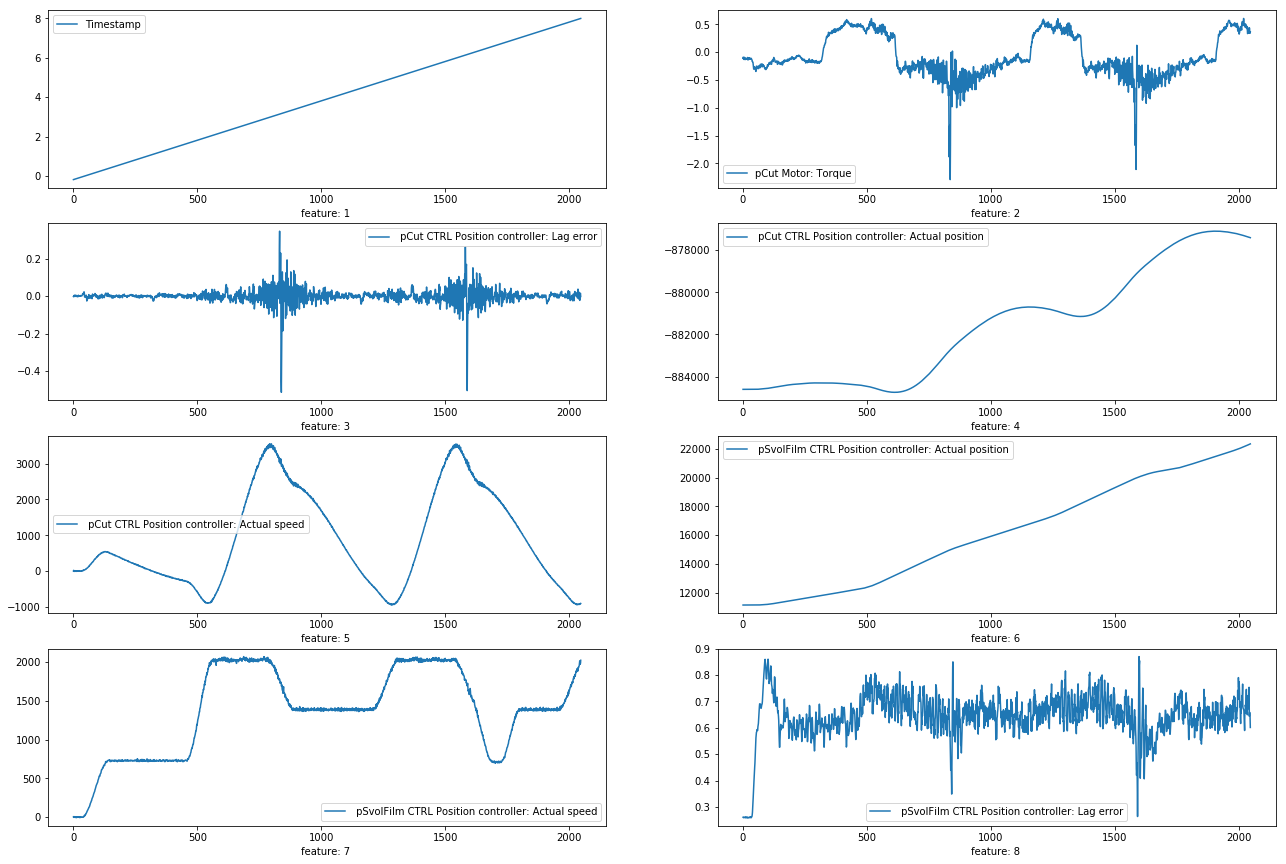

In [17]:
#Final input plor
plt.figure(figsize=(22,15))
for i in range(0,df_1.shape[1]):
    plt.subplot(4,2,i+1)
    plt.plot(df_1.iloc[:,i], label=l[i])
    plt.legend()
    plt.xlabel(f'feature: {i+1}')

In [10]:
##creating custom tensor
print(df_1.head())

   Timestamp  pCut Motor: Torque   pCut CTRL Position controller: Lag error  \
0     -0.188           -0.112131                                  -0.002490   
1     -0.184           -0.088931                                  -0.003863   
2     -0.180           -0.115141                                   0.001630   
3     -0.176           -0.111815                                   0.003003   
4     -0.172           -0.130970                                   0.004376   

    pCut CTRL Position controller: Actual position  \
0                                          -884606   
1                                          -884606   
2                                          -884606   
3                                          -884606   
4                                          -884606   

    pCut CTRL Position controller: Actual speed  \
0                                      0.000000   
1                                     17.166138   
2                                     -6.866455

In [14]:
df_final=df_1.append(df_2)
print(df_final.shape)

(6144, 7)


Writing a whole code just for df_1 as all the 3 together are not making sense from what I understand
1)Without any specific MinMaxScalling
2)With MinMaxScalling
3)With Normalization
Gotta do val 2 and 4 definitely
Just avoid doing val 1(strongest outlier),0 and 6...remaining normalize b/w (0,1) and standardize (x-mew/sigma)

In [16]:
l=df_1.columns
print(l)

Index(['Timestamp', 'pCut Motor: Torque',
       ' pCut CTRL Position controller: Lag error',
       ' pCut CTRL Position controller: Actual position',
       ' pCut CTRL Position controller: Actual speed',
       ' pSvolFilm CTRL Position controller: Actual position',
       ' pSvolFilm CTRL Position controller: Actual speed',
       ' pSvolFilm CTRL Position controller: Lag error'],
      dtype='object')


In [18]:
plt.figure(figsize=(30,22))
for i in range(0,features):
    plt.subplot(4,2,i+1)
    plt.plot(df_1_tensor[:,i], label=l[i])
    plt.legend()
    plt.xlabel(f'feature {i+1}')

NameError: name 'features' is not defined

<Figure size 2160x1584 with 0 Axes>

Code to normalize selected features, train_tensor

In [156]:
print(test_tensor.shape)

torch.Size([1, 2048, 7])


In [2]:
print(len(scal_objs))

NameError: name 'scal_objs' is not defined

In [19]:
df_1=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade001.csv')
df_2=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade002.csv')
df_3=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade003.csv')
##taking 1 and 2 for training data and 3 for test data

# Increasing data to 4096 for training and 2048 for testing

In [20]:
df_1=df_1.iloc[:,1:]
df_2=df_2.iloc[:,1:]
df_1=df_1.append(df_2)
print(df_1.shape)
#df_1=df_1.append(df_3.iloc[:1000,1:])
num=np.array(df_1)
df_1_ten=torch.tensor(num, dtype=torch.float32)
print(df_1_ten, df_1_ten.shape)

(4096, 7)
tensor([[-1.1213e-01, -2.4900e-03, -8.8461e+05,  ...,  1.1128e+04,
          2.5043e+00,  2.6108e-01],
        [-8.8931e-02, -3.8633e-03, -8.8461e+05,  ...,  1.1128e+04,
         -2.5043e+00,  2.6008e-01],
        [-1.1514e-01,  1.6298e-03, -8.8461e+05,  ...,  1.1128e+04,
          7.5130e+00,  2.5908e-01],
        ...,
        [-2.1498e-01, -3.7651e-03, -8.4861e+05,  ...,  2.0825e+04,
          6.7617e+01,  5.4126e-01],
        [-2.2431e-01, -3.8319e-03, -8.4861e+05,  ...,  2.0825e+04,
          6.5113e+01,  5.3676e-01],
        [-2.3109e-01, -1.1520e-03, -8.4861e+05,  ...,  2.0825e+04,
          5.7600e+01,  5.3631e-01]]) torch.Size([4096, 7])


In [21]:
num_df1=np.array(df_1_ten)
print(num_df1,num_df1.shape)
dummy2_ten=torch.tensor(num_df1)
print(dummy2_ten,dummy2_ten.shape)#,dummy2.shape[0])

[[-1.1213127e-01 -2.4900441e-03 -8.8460600e+05 ...  1.1128000e+04
   2.5042892e+00  2.6108497e-01]
 [-8.8930510e-02 -3.8633349e-03 -8.8460600e+05 ...  1.1128000e+04
  -2.5042892e+00  2.6008320e-01]
 [-1.1514061e-01  1.6298291e-03 -8.8460600e+05 ...  1.1128000e+04
   7.5130162e+00  2.5908148e-01]
 ...
 [-2.1497728e-01 -3.7651060e-03 -8.4860800e+05 ...  2.0825000e+04
   6.7617218e+01  5.4126126e-01]
 [-2.2430819e-01 -3.8318629e-03 -8.4860800e+05 ...  2.0825000e+04
   6.5112854e+01  5.3675818e-01]
 [-2.3108983e-01 -1.1520390e-03 -8.4860700e+05 ...  2.0825000e+04
   5.7599842e+01  5.3630710e-01]] (4096, 7)
tensor([[-1.1213e-01, -2.4900e-03, -8.8461e+05,  ...,  1.1128e+04,
          2.5043e+00,  2.6108e-01],
        [-8.8931e-02, -3.8633e-03, -8.8461e+05,  ...,  1.1128e+04,
         -2.5043e+00,  2.6008e-01],
        [-1.1514e-01,  1.6298e-03, -8.8461e+05,  ...,  1.1128e+04,
          7.5130e+00,  2.5908e-01],
        ...,
        [-2.1498e-01, -3.7651e-03, -8.4861e+05,  ...,  2.0825e+04,
 

In [22]:
num=np.array(df_3.iloc[:,1:])
test_ten=torch.tensor(num, dtype=torch.float32)
print(test_ten, test_ten.shape)

tensor([[-3.0946e-02, -1.1168e-03, -8.4501e+05,  ...,  2.5528e+04,
         -2.5043e+00, -7.8373e-02],
        [-3.5880e-02,  2.5654e-04, -8.4501e+05,  ...,  2.5528e+04,
          0.0000e+00, -8.0376e-02],
        [-4.4996e-02,  3.0031e-03, -8.4501e+05,  ...,  2.5528e+04,
         -1.0017e+01, -7.5367e-02],
        ...,
        [-3.8165e-01, -7.4387e-05, -8.3882e+05,  ...,  3.5097e+04,
          0.0000e+00,  3.5250e-01],
        [-3.8313e-01, -7.4387e-05, -8.3882e+05,  ...,  3.5097e+04,
          7.5130e+00,  3.5150e-01],
        [-3.8478e-01, -7.4387e-05, -8.3882e+05,  ...,  3.5097e+04,
          5.0087e+00,  3.5250e-01]]) torch.Size([2048, 7])


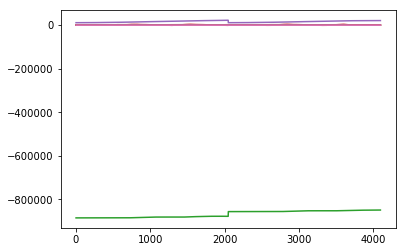

In [14]:
plt.plot(df_1_ten)

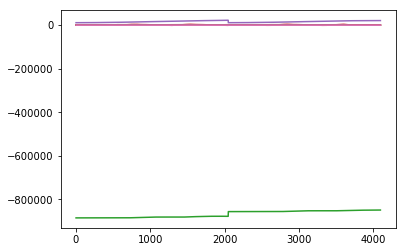

In [534]:
plt.plot(scalex.inverse_transform(df_1_tensor))

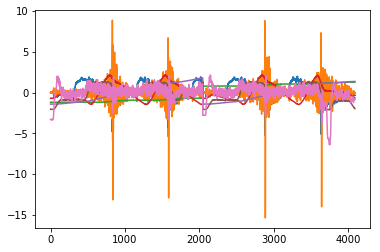

In [23]:
scalex=StandardScaler().fit(df_1_ten)
df_1_tensor=scalex.transform(df_1_ten)
df_1_tensor=torch.tensor(df_1_tensor, dtype=torch.float32)
plt.plot(df_1_tensor)

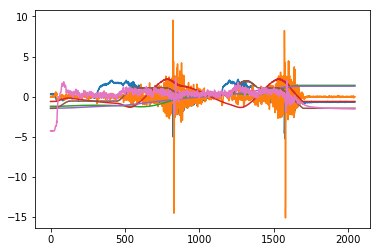

In [25]:
scaley=StandardScaler().fit(test_ten)
test_tensor=scaley.transform(test_ten)
test_tensor=torch.tensor(test_tensor, dtype=torch.float32)
plt.plot(test_tensor)

Trying to get inverse scalling correctly

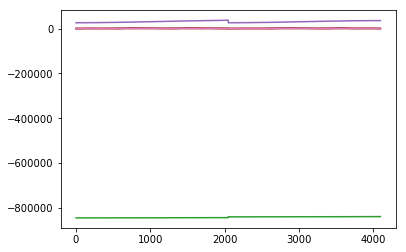

In [536]:
plt.plot(scaley.inverse_transform(df_1_tensor))

In [414]:
print(scalex)

StandardScaler()


In [446]:
#len(scal_objs)
print(scal_objs)

[StandardScaler(), StandardScaler()]


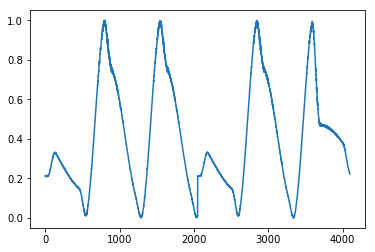

In [35]:
#df_1_tensor=df_1_tensor.reshape((1,2048,7))
val=3
plt.plot(df_1_tensor[:,val])

Normalizing test tensor

In [201]:
print(test_tensor.shape)

torch.Size([1, 2048, 7])


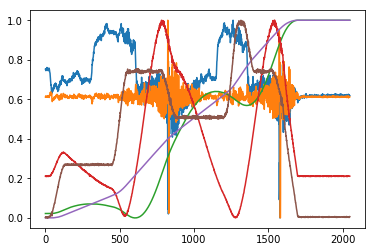

In [359]:
for val in range(0,df_1_tensor.shape[1]):
    x=MinMaxScaler().fit_transform(test_tensor[:,val].reshape(-1,1))
    x=x.reshape(-1)
    x=torch.tensor(x, dtype=torch.float32)
    test_tensor[:,val]=x
    plt.plot(test_tensor[:,val])

In [246]:
df_1=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade001.csv')
df_2=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade002.csv')
df_3=pd.read_csv('Datasets/Rapid Component degradation Vega/NewBlade003.csv')
##taking 1 and 2 for training data and 3 for test data


# Setting rows and columns if the variables are ever needed ahead

In [26]:
train_rows=df_1_tensor.shape[0]
features=df_1_tensor.shape[1]
test_rows=test_tensor.shape[0]
test_columns=test_tensor.shape[1]
print(train_rows,features,test_rows,test_columns)

4096 7 2048 7


In [28]:
bs=5

In [70]:
for i in range(1,train_rows+1):
    if(i%bs==0):
        new_len=i
print(new_len)
print(train_rows//bs)
df_1_tensor=df_1_tensor[:new_len,:]
print(df_1_tensor.shape)
for i in range(1,test_rows+1):
    if(i%bs==0):
        new_len=i
print(new_len)
test_tensor=test_tensor[:new_len,:]
print(test_tensor.shape)
df_1_tensor=df_1_tensor.reshape((train_rows//bs,bs,features))
test_tensor=test_tensor.reshape((test_rows//bs,bs,features))
print(df_1_tensor.shape,test_tensor.shape)

4095
819
torch.Size([819, 5, 7])
2045
torch.Size([409, 5, 7])
torch.Size([819, 5, 7]) torch.Size([409, 5, 7])


In [148]:
print(df_1_tensor.shape, test_tensor.shape)

torch.Size([819, 5, 7]) torch.Size([409, 5, 7])


# Some rough work to write down functions---Quite productive

In [12]:
model.parameters

NameError: name 'model' is not defined

In [84]:
model.parameterseters

<bound method Module.parameters of Test(
  (encoder): ModuleDict(
    (Linear): Linear(in_features=300, out_features=20, bias=True)
    (Lstm1): LSTM(7, 400)
    (Lstm2): LSTM(400, 300)
  )
  (decoder): ModuleDict(
    (Linear): Linear(in_features=200, out_features=14, bias=True)
    (Lstm3): LSTM(10, 300)
    (Lstm4): LSTM(300, 200)
  )
)>

In [647]:
x=torch.tensor(5)

In [707]:
print(torch.tensor(5.0).normal_(5.0,100.0))

TypeError: normal_() takes from 0 to 2 positional arguments but 3 were given

In [14]:
features =7

In [720]:
print(p.size())

torch.Size([])


In [748]:
print(x.mul(0.5).exp())
p=x.mul(0.5).exp()
z=p.data.new(p.size()).normal_(50,)
print(z)

tensor(12.1825)
tensor(50.4162)


In [13]:
##making an LSTM to understand
##Made the whole thing, atleast I can say that I embedded an LSTM into the network somehow with a linear layer using dictionaries
# var is the LSTM nodes
class Test(nn.Module):
    def __init__(self,n_features, var, bottleneck_nodes):
        super().__init__()

        self.n_features, self.var=n_features,var
        self.bot_nodes=bottleneck_nodes
        ##took me a fill evenings and frustration, LSTM always takes 3 dimesions, let the first one be 1
        self.encoder=nn.ModuleDict({
            'Lstm1':nn.LSTM(
                input_size=self.n_features,
                hidden_size=self.var*4,
            ),
            'Lstm2':nn.LSTM(
                input_size=self.var*4,
                hidden_size=self.var*3,
               # num_layers=2,
            ),
#             'Lstm3' :nn.LSTM(
#                 input_size=self.var*2, 
#                 hidden_size=self.var*3
#             ),
            'Linear':nn.Linear(self.var*3, 
                               self.bot_nodes*2
                              ) # Can vary the bottle neck
        })
        
        self.decoder=nn.ModuleDict({
            'Lstm3':nn.LSTM(
                input_size=self.bot_nodes,
                hidden_size=self.var*3
            ),
            'Lstm4':nn.LSTM(
                input_size=self.var*3,
                hidden_size=self.var*2,
            ),
           #     num_layers=2,
#             ),'Lstm6':nn.LSTM(
#                 input_size=self.var*3,
#                 hidden_size=self.var
#             ),
            'Linear':nn.Linear(self.var*2,
                               self.n_features*2),
#             'Logsoftmax':nn.LogSoftmax(dim=1),
#             'Relu':nn.ReLU()
        })
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_() #acually epsilon is from normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu) #Mew+eps*sigma
        else:
            return mu
    
    def forward(self,x):
        length=x.shape[0]  #to get seq_len
        x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
        x,_=self.encoder['Lstm1'](x)
        x,_=self.encoder['Lstm2'](x)
#        x,_=self.encoder['Lstm3'](x)
        mu_logvar=self.encoder['Linear'](x)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
        mu1=mu_logvar[:, :, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
        logvar1 = mu_logvar[:,:, self.bot_nodes:self.bot_nodes*2]
        z=self.getsample(mu1,logvar1)#need to feed this to the decoder
        sample=z
        #reshape it into (hidden_dim x features)
#        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
#        z=z.reshape((1, length, self.bot_nodes))
        d,_=self.decoder['Lstm3'](z)
        d,_=self.decoder['Lstm4'](d)
#        d,_=self.decoder['Lstm6'](d)
#         #z=z.reshape((1, self,self.var*2))
        d=self.decoder['Linear'](d)
#         ##tried log softmax as it woud
        mu2=d[:,:,0:self.n_features]
        logvar2=d[:,:,self.n_features:self.n_features*2]
#       z=self.getsample(mu1,logvar1)----no need to remove sample frm here, just train your model for now
        return mu2,logvar2,mu1,logvar1,sample
#mu2,logvar2,mu1,logvar1
#if problem
#1) Put relu b/w LSTM and linear---actually didnt need this

In [39]:
for x in df_1_tensor:
    mu2,logvar2,mu1,logvar1,sample=model(x)
    print(mu2,"shape",mu2.shape,"\n", logvar2,"shape",logvar2.shape,"\n",mu1,"shape",
    mu1.shape,"\n",logvar1,"shape",logvar1.shape,sample,"\nsample",sample.shape)

tensor([[[ 0.0228,  0.0231,  0.0077,  ...,  0.0563,  0.0927,  0.1099],
         [ 0.0575,  0.0052, -0.0135,  ...,  0.0515,  0.0709,  0.1147],
         [ 0.1398,  0.0130, -0.0503,  ...,  0.0121,  0.0749,  0.1655],
         ...,
         [ 0.0727,  0.0130, -0.0760,  ...,  0.0310,  0.0275,  0.1105],
         [ 0.0663,  0.0073, -0.0824,  ...,  0.0551,  0.0248,  0.0937],
         [ 0.0768,  0.0256, -0.1015,  ...,  0.0504,  0.0447,  0.1275]]],
       grad_fn=<SliceBackward>) shape torch.Size([1, 2048, 7]) 
 tensor([[[ 0.0277,  0.1277, -0.1097,  ..., -0.0343,  0.0104,  0.1135],
         [-0.0012,  0.0980, -0.0966,  ...,  0.0123,  0.0286,  0.0688],
         [-0.0470,  0.0599, -0.0882,  ...,  0.0020, -0.0121,  0.0666],
         ...,
         [ 0.0095,  0.0893, -0.1051,  ...,  0.0242,  0.0149,  0.0486],
         [-0.0259,  0.0439, -0.1157,  ...,  0.0376,  0.0546,  0.0096],
         [ 0.0033,  0.0628, -0.1141,  ...,  0.0012, -0.0005,  0.0295]]],
       grad_fn=<SliceBackward>) shape torch.Size([1

In [37]:
def loss_function(mu2,logvar2,mu1,logvar1,x):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
#     BCE=nn.functional.nll_loss( #trying MSE loss
#         x_hat, x.view(-1,7), reduction='sum'
#     )
#     Log probability: 
#         log(p(x | \mu, \sigma)) = -0.5 (\log(2\pi) + (x-mu)^2/\sigma^2 + \log(\sigma^2))
##using my custom negative log likelihood funciton
    #KLD= -0.5 * torch.mean(torch.exp(logvar1) - logvar1 - 1 + mu1.pow(2))
    KLD=-0.5*torch.mean(logvar1+1-(torch.exp(logvar1)+torch.square(mu1)))
    #NLL=0.5*torch.sum(torch.log(2*torch.pi) + torch.square(x-mu2)/logvar2.exp()+logvar2)
    c=torch.log(2*torch.pi)
    b=logvar2
    a= torch.square(x-mu2)/torch.exp(logvar2)
    NLL=0.5*(a+b+c)
    NLL=torch.mean(NLL)
    MSE=torch.mean((x-mu2)**2)
    
    return NLL+KLD

def loss_function(mu2,logvar2,mu1,logvar1,x):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
#     BCE=nn.functional.nll_loss( #trying MSE loss
#         x_hat, x.view(-1,7), reduction='sum'
#     )
#     Log probability: 
#         log(p(x | \mu, \sigma)) = -0.5 (\log(2\pi) + (x-mu)^2/\sigma^2 + \log(\sigma^2))
##using my custom negative log likelihood funciton
    #KLD= -0.5 * torch.mean(torch.exp(logvar1) - logvar1 - 1 + mu1.pow(2))
    KLD=-0.5*torch.mean(logvar1+1-(torch.exp(logvar1)+torch.square(mu1)))
    #NLL=0.5*torch.sum(torch.log(2*torch.pi) + torch.square(x-mu2)/logvar2.exp()+logvar2)
    c=torch.log(2*torch.pi)
    b=logvar2
    a= torch.square(x-mu2)/torch.exp(logvar2)
    NLL=0.5*(a+b+c)
    NLL=torch.mean(NLL)
    MSE=torch.mean((x-mu2)**2)
    
    return NLL+KLD

In [503]:
for x in df_1_tensor:
    print(x.dtype)

float64


In [751]:
print(df_1_tensor.shape)

torch.Size([4096, 7])


In [48]:
df_1_tensor=df_1_tensor.reshape((1,train_rows,features))
print(df_1_tensor.shape)

RuntimeError: shape '[1, 4096, 7]' is invalid for input of size 28665

In [753]:
dummy2=dummy2.reshape((1,4096,7))
print(dummy2.shape)

torch.Size([1, 4096, 7])


In [ ]:
train_losses=[]
test_losses=[]
MSE_loss=[]
learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)

In [16]:
model.parameters

<bound method Module.parameters of Test(
  (encoder): ModuleDict(
    (Linear): Linear(in_features=300, out_features=20, bias=True)
    (Lstm1): LSTM(7, 400)
    (Lstm2): LSTM(400, 300)
  )
  (decoder): ModuleDict(
    (Linear): Linear(in_features=200, out_features=14, bias=True)
    (Lstm3): LSTM(10, 300)
    (Lstm4): LSTM(300, 200)
  )
)>

In [15]:
epochs=20
lstm_nodes,bot_nodes=100,10
model=Test(features,lstm_nodes,bot_nodes)

In [73]:
train_losses=[]
test_losses=[]
MSE_loss=[]
learn_rate=1e-3
optimizer=torch.optim.Adam(
     model.parameters(), lr=learn_rate
)
starttime_training = time.process_time()
for epoch in range(0,epochs+1):
    #training
    model.train()
    train_loss=0
##x happens only once since that is how the data has been split, no batch SGD is used
    for x in df_1_tensor:
        x1=x
        optimizer.zero_grad()
        #============forward=========
        mu2,logvar2,mu1,logvar1,z=model(x)
        loss=loss_function(mu2,logvar2,mu1,logvar1,x)
        train_loss+=loss.item()
        #=====backpropagation=======
        #print(train_loss)
        loss.backward()
        optimizer.step()
        #=====log======
    train_losses.append(train_loss/df_1_tensor.shape[0])    
    print("train loss in epoch",epoch,train_loss/df_1_tensor.shape[0])#,train_loss)
    with torch.no_grad():
        model.eval()#to prevent gradient evaluation during testing alongwith torch.no_grad()
        test_loss=0
        MSE=0
        L1=0
        for x in test_tensor:
            seq_len=x.shape[0]
            points=x.shape[1]
            #==============forward=========
            mu2,logvar2,mu1,logvar1,z = model(x)
            test_loss += loss_function(mu2,logvar2,mu1,logvar1,x).item()    ##same as training
            mu2=mu2.reshape(bs,features)
            L1=nn.L1Loss()
            L1=L1(x,mu2)
            MSE=nn.MSELoss()
            MSE=MSE(x,mu2)
#             test_loss+=MSE.item()#L1.item()+
        test_losses.append(test_loss/test_tensor.shape[0])    
        print("test loss in epoch",epoch,test_loss/test_tensor.shape[0])
        #=====MSE of sample and i/p for synthetic data======
# z=torch.randn([1,train_rows,features])
# d,_=model.decoder['Lstm3'](z)
# d,_=model.decoder['Lstm4'](d)
# #        d,_=model.decoder['Lstm6'](d)
# d=model.decoder['Linear'](d)
# mu2=d[:,:,0:features]
# logvar2=d[:,:,features:features*2]
# d=model.getsample(mu2,logvar2)
# endtime_training = time.process_time()
# print("Runtime of operation",(endtime_training-starttime_training))
#         MSE=torch.mean((x1-d)**2)
#         MSE_loss.append(MSE)
#         print("MSE of synthetic data and i/p",epoch,MSE.item())
        #================log===========
#             means.append(mu.detach())    ###WHy detach()??? to avoid a copy
#             logvars.append(logvar.detach())
#             labels.append(y.detach())
        
        
# feed something like this to generate some synthetic time series data            
#     x=torch.randn([1,4096,7])
#     print(x)

train loss in epoch 0 4.6156314737491835
test loss in epoch 0 1.8784604259108564
train loss in epoch 1 1.4917210807730428
test loss in epoch 1 1.3639398746210671
train loss in epoch 2 1.4123792552249335
test loss in epoch 2 1.3409748574340838
train loss in epoch 3 1.3827534898733482
test loss in epoch 3 1.4703726699999318
train loss in epoch 4 1.35970384035355
test loss in epoch 4 1.423081440709914
train loss in epoch 5 1.3469651928023687
test loss in epoch 5 1.2398179078743334
train loss in epoch 6 1.2802290728313437
test loss in epoch 6 1.3579918520666276
train loss in epoch 7 1.1674673053662272
test loss in epoch 7 1.811017540818613
train loss in epoch 8 1.0858622750265112
test loss in epoch 8 7.936870616630704
train loss in epoch 9 1.0572116485500074
test loss in epoch 9 10.765454600230406
train loss in epoch 10 1.122559523844457
test loss in epoch 10 3.8560251322527095
train loss in epoch 11 1.0052359600679923
test loss in epoch 11 31.751053208098142
train loss in epoch 12 1.06909

In [77]:
with torch.no_grad():
    model.eval()
    z=torch.randn([1,train_rows,bot_nodes])
    d,_=model.decoder['Lstm3'](z)
    d,_=model.decoder['Lstm4'](d)
#        d,_=model.decoder['Lstm6'](d)
    d=model.decoder['Linear'](d)
    mu2=d[:,:,0:features]
    logvar2=d[:,:,features:features*2]
    d=model.getsample(mu2,logvar2)

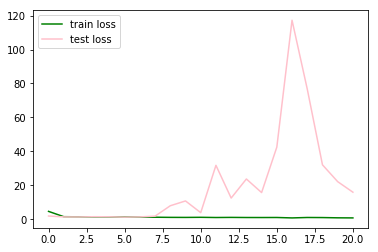

In [76]:
plt.plot(train_losses,color='green', label='train loss')
plt.legend()
plt.plot(test_losses,color='pink', label='test loss')
plt.legend()
plt.plot(MSE_loss)

In [1]:
plt.plot(train_losses,color='green', label='train loss')
plt.legend()
plt.plot(test_losses,color='pink', label='test loss')
plt.legend()
plt.plot(MSE_loss)

NameError: name 'plt' is not defined

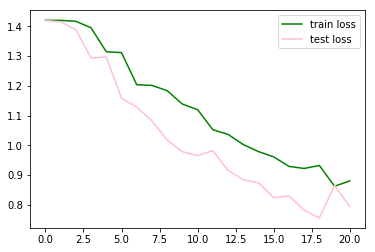

In [922]:
plt.plot(train_losses,color='green', label='train loss')
plt.legend()
plt.plot(test_losses,color='pink', label='test loss')
plt.legend()
plt.plot(MSE_loss)

Got some generative time series data
By using only part 1

In [99]:
z=torch.randn([2,2048,7])
d,_=model.decoder['Lstm'](z)
d=model.decoder['Linear'](d)
mu2=d[:,:,0:features]
logvar2=d[:,:,features:features*2]
d=model.getsample(mu2,logvar2)
print(d,d.shape)

KeyError: 'Lstm'

In [85]:
print(train_rows)

5096


In [78]:
d=d.reshape((train_rows,features))
print(d.shape)
df_1_tensor=df_1_tensor.reshape((train_rows-1,features))
print(df_1_tensor.shape)
p=torch.tensor(scalex.inverse_transform(d))
print(p.shape)

torch.Size([4096, 7])
torch.Size([4095, 7])
torch.Size([4096, 7])


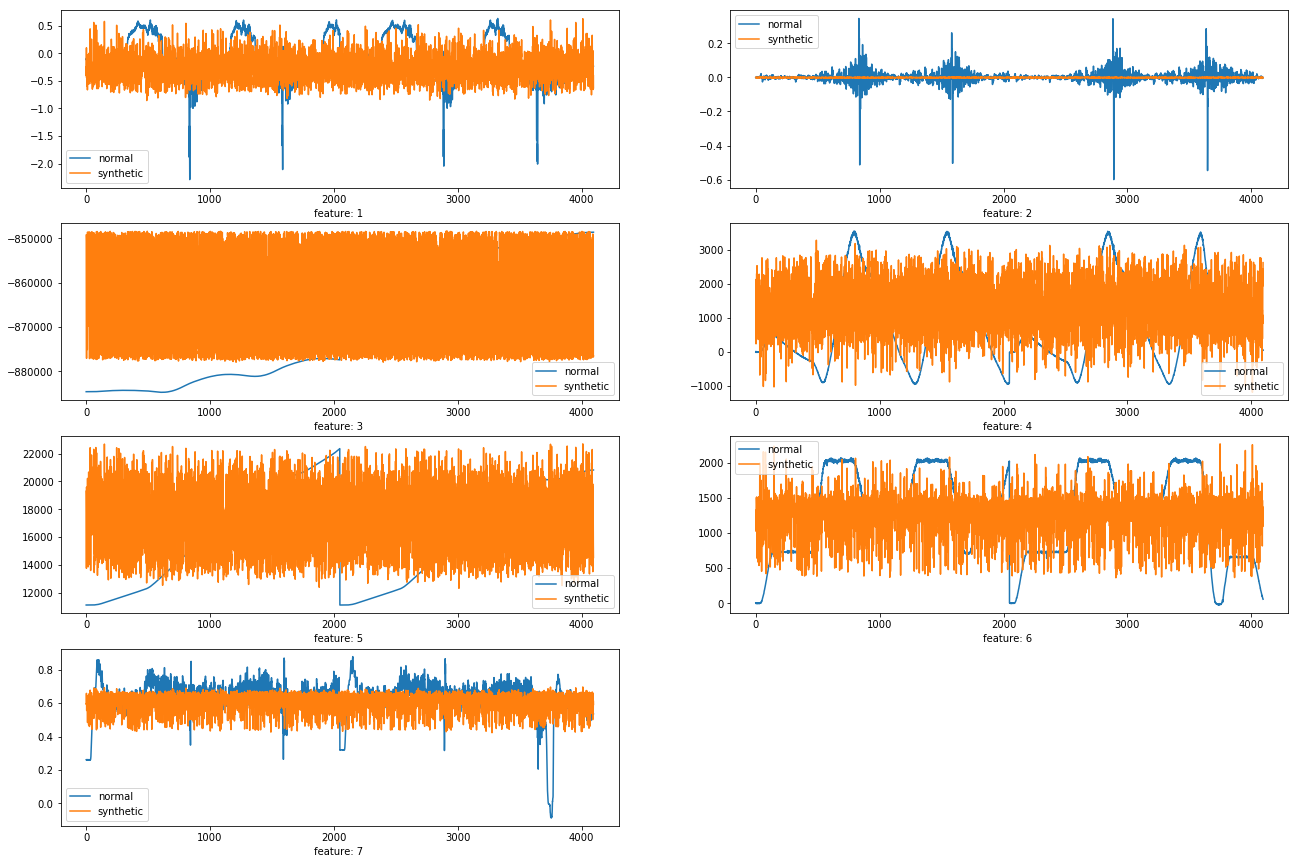

In [79]:
plt.figure(figsize=(22,15))
for i in range(0,df_1_ten.shape[1]):
    plt.subplot(4,2,i+1)
    plt.plot(df_1_ten[:,i], label="normal")
    plt.legend()
    plt.plot(p[:,i],label="synthetic")
    plt.legend()
    plt.xlabel(f'feature: {i+1} ')

Text(0.5, 0, 'feature: 6 ')

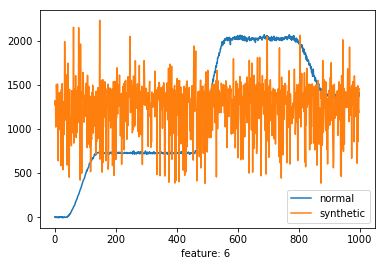

In [82]:
idx=5
pts=1000
plt.plot(df_1_ten[:pts,idx], label="normal")
plt.legend()
plt.plot(p[:pts,idx],label="synthetic")
plt.legend()
plt.xlabel(f'feature: {idx+1} ')

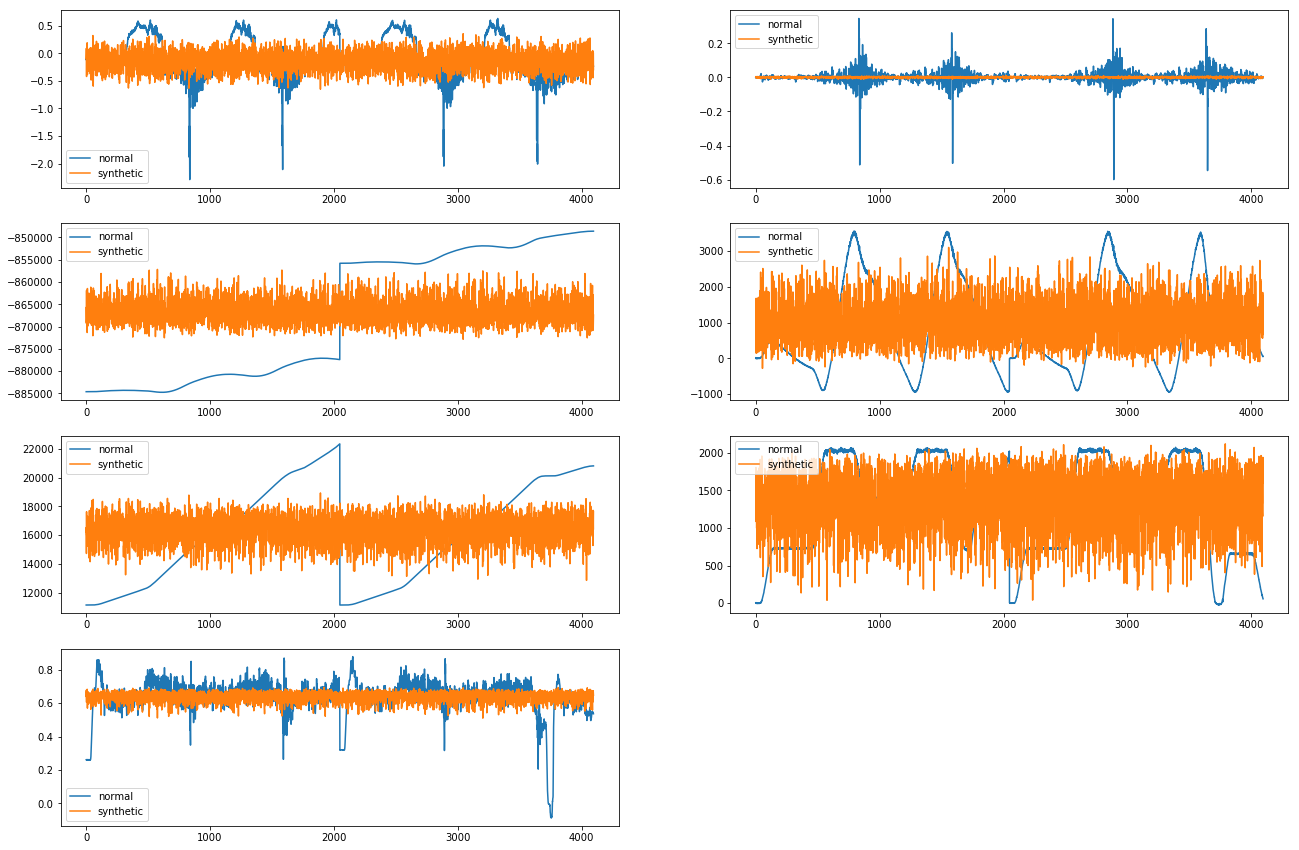

In [812]:
plt.figure(figsize=(22,15))
for i in range(0,df_1_ten.shape[1]):
    plt.subplot(4,2,i+1)
    plt.plot(df_1_ten[:,i], label="normal")
    plt.legend()
    plt.plot(p[:,i],label="synthetic")
    plt.legend()

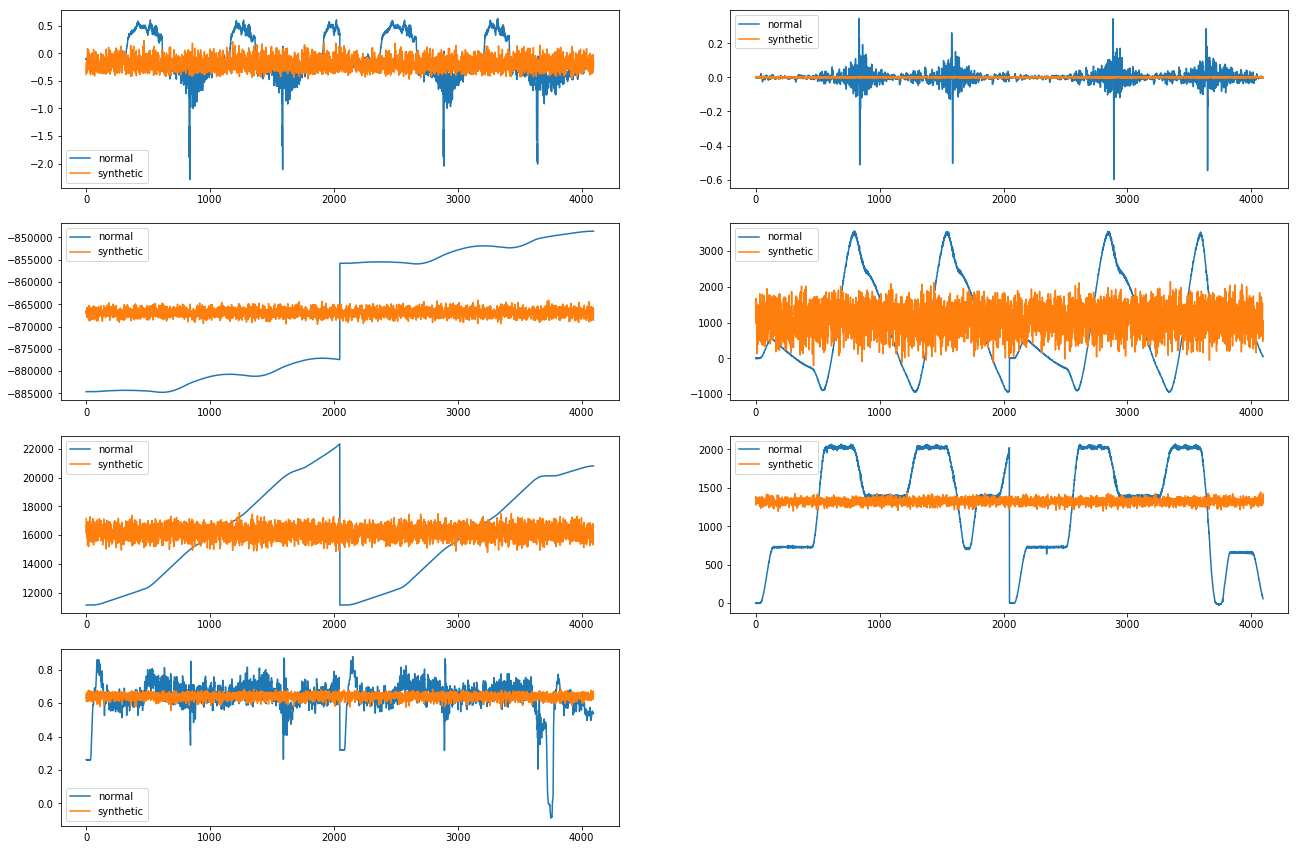

In [613]:
plt.figure(figsize=(22,15))
for i in range(0,df_1_ten.shape[1]):
    plt.subplot(4,2,i+1)
    plt.plot(df_1_ten[:,i], label="normal")
    plt.legend()
    plt.plot(p[:,i],label="synthetic")
    plt.legend()

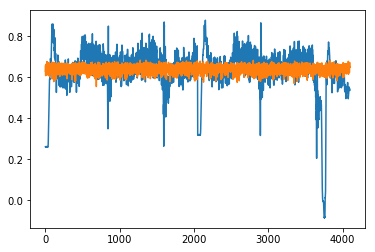

In [632]:
plt.plot(df_1_ten[:,6])
plt.plot(p[:,6])

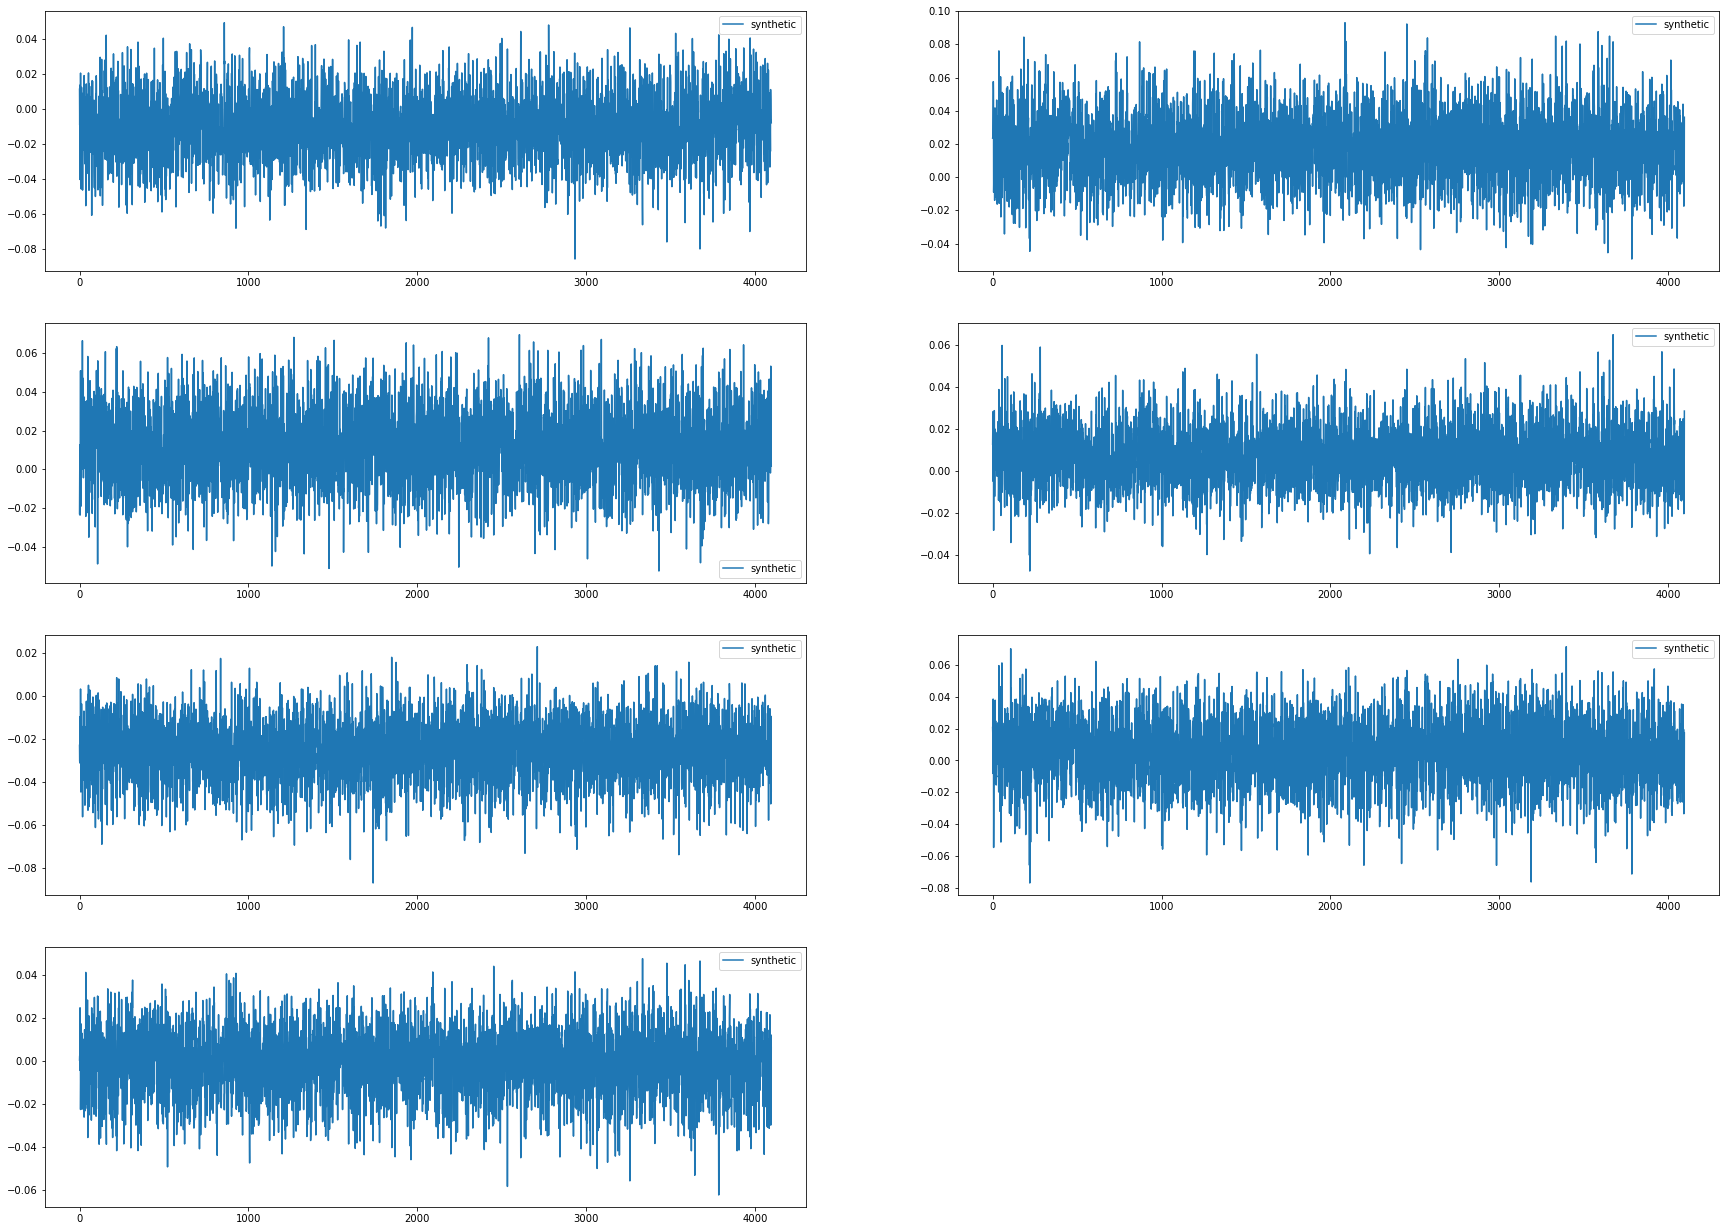

In [549]:
plt.figure(figsize=(30,22))
for i in range(0,train_columns):
    plt.subplot(4,2,i+1)
    plt.plot(d[:,i], label="synthetic")
    #plt.plot(d[:,i], label=l[i])
    plt.legend()

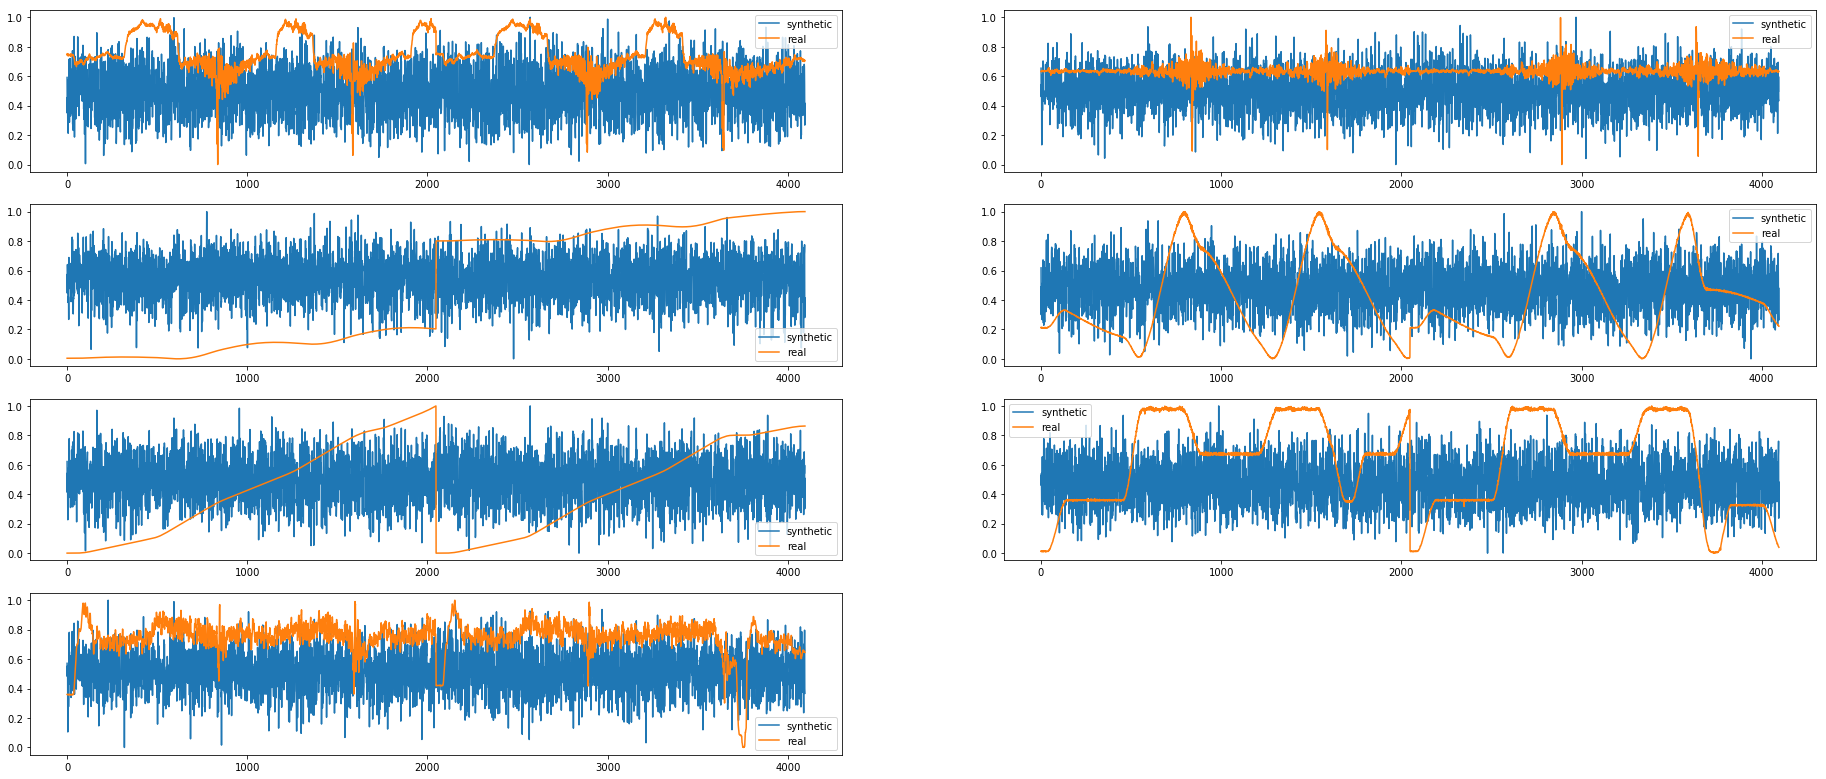

In [272]:
plt.figure(figsize=(32,28))
for i in range(0,features):
#     print("Synthetic data values",torch.max(d[:,0,i]), torch.min(d[:,0,i]))
#     print("i/p scaled value",torch.max(df_1_tensor[:,0,i]), torch.min(df_1_tensor[:,0,i]))
    plt.subplot(8,2,i+1)
    #plt.plot(d[:,i],label="synthetic")
    #plt.plot(scal_objs[i].inverse_transform(d[:,i].reshape(-1,1)), label="synthetic")
    plt.plot(scal_objs[i].fit_transform(d[:,i].reshape(-1,1)), label="synthetic")
    plt.legend()
#     plt.plot(dummy[0,:,i], label="noisy")
#     plt.legend()
    plt.plot(df_1_tensor[:,i], label="real")
    plt.legend()

# Principal component analysis

In [956]:
from sklearn.decomposition import PCA

In [955]:
print(df_1_tensor.shape)

torch.Size([4096, 7])


In [963]:
!pip install plotly

In [983]:
pca = PCA()
principalComponents = pca.fit_transform(d)
principalDf = pd.DataFrame(data = principalComponents
                          )#, columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())
print(principalDf.shape)

          0         1         2         3         4         5         6
0  0.050024 -0.058736 -0.270483 -0.030225  0.015870  0.033529  0.006375
1 -0.638681  0.264422  0.061744 -0.051768  0.048813 -0.065806  0.006377
2  0.575138 -0.491888  0.125018  0.000421  0.020070  0.000717 -0.022413
3  0.049870  0.441784  0.138689 -0.105952 -0.046089 -0.009042  0.006216
4  0.384851 -0.034216  0.182279 -0.041124 -0.045620  0.042316 -0.026700
(4096, 7)


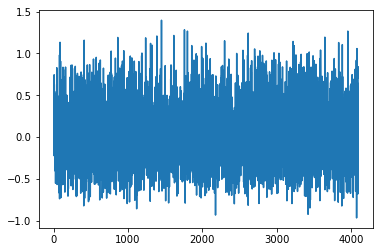

In [982]:
plt.plot(d[:,0])

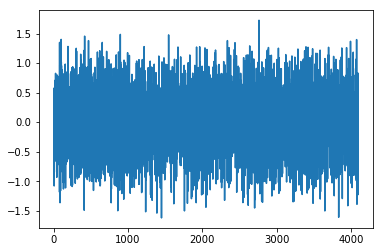

In [984]:
plt.plot(principalDf.iloc[:,0])

In [996]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df_1_tensor)
principalDf = pd.DataFrame(data = principalComponents
                          )#, columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())
print(principalDf.shape)

          0         1         2         3
0 -0.461823  3.424955 -0.974751  2.005068
1 -0.495848  3.431472 -0.932679  2.020524
2 -0.443376  3.427184 -1.055623  1.953382
3 -0.451102  3.432599 -1.084143  1.932064
4 -0.412627  3.424017 -1.124302  1.920724
(4096, 4)


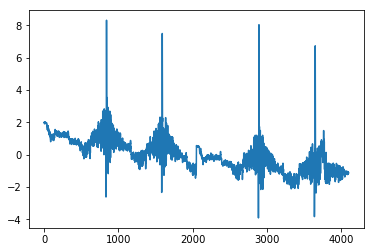

In [999]:
plt.plot(principalDf.iloc[:,3])

NameError: name 'finalDf' is not defined

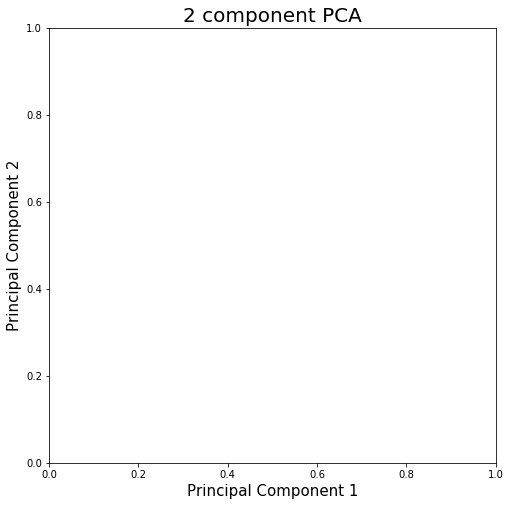

In [968]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [965]:
import plotly as px

In [1001]:
p=model(torch.randn([4096,7]))

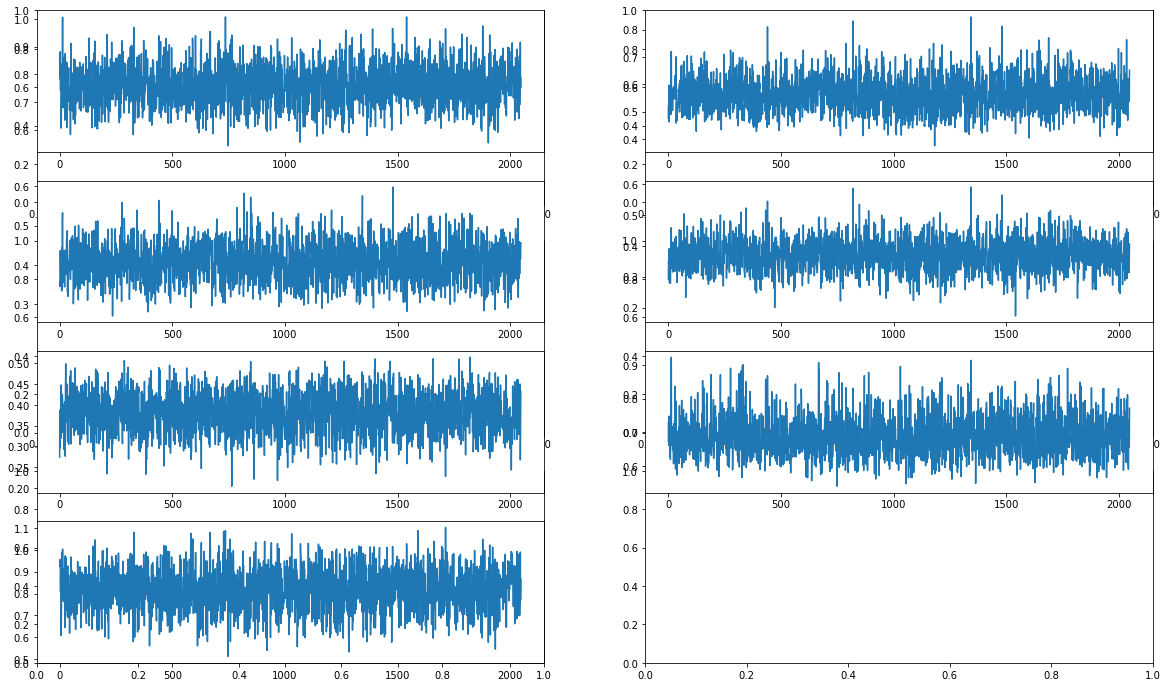

In [68]:
#plt.plot(d[0,:,3].detach().numpy())
fig, axs=plt.subplots(3,2,figsize=(20,12))

fig.add_subplot(4,2,1)
plt.plot(d[0,:,0].detach().numpy())

fig.add_subplot(4,2,2)
plt.plot(d[0,:,1].detach().numpy())

fig.add_subplot(4,2,3)
plt.plot(d[0,:,2].detach().numpy())

fig.add_subplot(4,2,4)
plt.plot(d[0,:,3].detach().numpy())
fig.add_subplot(4,2,5)
plt.plot(d[0,:,4].detach().numpy())
fig.add_subplot(4,2,6)
plt.plot(d[0,:,5].detach().numpy())
fig.add_subplot(4,2,7)
plt.plot(d[0,:,6].detach().numpy())

In [ ]:
fig, axs=plt.subplots(3,2,figsize=(20,12))

fig.add_subplot(4,2,1)
plt.plot(train[0,:,0].detach().numpy())

fig.add_subplot(4,2,2)
plt.plot(d[0,:,1].detach().numpy())

fig.add_subplot(4,2,3)
plt.plot(d[0,:,2].detach().numpy())

fig.add_subplot(4,2,4)
plt.plot(d[0,:,3].detach().numpy())
fig.add_subplot(4,2,5)
plt.plot(d[0,:,4].detach().numpy())
fig.add_subplot(4,2,6)
plt.plot(d[0,:,5].detach().numpy())
fig.add_subplot(4,2,7)
plt.plot(d[0,:,6].detach().numpy())

In [277]:
print(df_1_tensor.shape)

torch.Size([2, 2048, 7])


In [570]:
-----not using because shouldnt include in the main function directly
def loss_function2(mu2,logvar2,mu1,logvar1,x,z,seq_len):
    torch.pi = torch.acos(torch.zeros(1)).item() * 2
    torch.pi=torch.tensor(torch.pi)
#     BCE=nn.functional.nll_loss( #trying MSE loss
#         x_hat, x.view(-1,7), reduction='sum'
#     )
#     Log probability: 
#         log(p(x | \mu, \sigma)) = -0.5 (\log(2\pi) + (x-mu)^2/\sigma^2 + \log(\sigma^2))
##using my custom negative log likelihood funciton
    KLD= 0.5 * torch.sum(logvar1.exp() - logvar1 - 1 + mu1.pow(2)) ## the KL divergence is wrt a Normal distribution ~N(0,1)
    NLL=-0.5*torch.sum(torch.log(2*torch.pi) + torch.square(x-mu2)/logvar2.exp()+logvar2)
    MSE=torch.sum((x-z)**2)/4096 ##MSE & L1 cant be calculated when dimension of bottleneck and i/p different?? # try mean squred error b/w o/p and i/p
    L1=torch.sum(x-z)/4096##MSE & L1 cant be calculated when dimension of bottleneck and i/p different??
    
    return NLL+KLD+MSE+L1

In [841]:
##making an LSTM to understand
##Made the whole thing, atleast I can say that I embedded an LSTM into the network somehow with a linear layer using dictionaries
class Test_linear(nn.Module):
    def __init__(self,n_features, var, bottleneck_nodes):
        super().__init__()

        self.n_features, self.var=n_features,var
        self.bot_nodes=bottleneck_nodes
        ##took me a fill evenings and frustration, LSTM always takes 3 dimesions, let the first one be 1
        self.encoder=nn.ModuleDict({
            'Lstm':nn.LSTM(
                input_size=self.n_features,
                hidden_size=self.var,
            ),
            #'Linear':nn.Linear(self.var, self.bot_nodes*2)# Can vary the bottle neck
            'Linear':nn.Linear(self.n_features, self.bot_nodes*2) 
        })
        
        
        self.decoder=nn.ModuleDict({
            'Lstm':nn.LSTM(
                input_size=self.bot_nodes,
                hidden_size=self.var*2
            ),
            #'Linear':nn.Linear(self.var*2,self.n_features*2),
            'Linear':nn.Linear(self.bot_nodes,self.n_features*2),
            'Logsoftmax':nn.LogSoftmax(dim=1),
            'Relu':nn.ReLU()
        })
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_() #acually epsilon is form normal dis table, sample is the whole Mew+X*sigma
            return eps.mul(stan_dev).add_(mu) #Mew+X*sigma
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]  #to get seq_len
##         x=x.reshape((1, length, self.n_features))# batch sends the whole things, not using SGD,
##         x,_=self.encoder['Lstm'](x)
        mu_logvar=self.encoder['Linear'](x)
        #a leap of faith, for knowing how mu is [:0:] and logvar[:1:], actually just a bunch of the outputs 
        #taken as mean and variance
#        mu1=mu_logvar[:, 0:self.bot_nodes]# dimension at mu_logvar1/bottleneck               
#        logvar1 = mu_logvar[:, self.bot_nodes:self.bot_nodes*2]
        mu1=torch.zeros([length, self.bot_nodes])
        logvar1=torch.zeros([length, self.bot_nodes])
        z=self.getsample(mu1,logvar1)#need to feed this to the decoder
        sample=z
        #reshape it into (hidden_dim x features)
#        z=z.reshape((1, length, self.n_features)) #dont need the reshape anymore
##        z,_=self.decoder['Lstm'](z)
#         #z=z.reshape((1, self,self.var*2))
        z=self.decoder['Linear'](z)
#         ##tried log softmax as it woud
##         mu2=z[:,:,0:self.n_features]
##         logvar2=z[:,:,self.n_features:self.n_features*2]
        mu2=z[:,0:self.n_features]
        logvar2=z[:,self.n_features:self.n_features*2]
#       z=self.getsample(mu1,logvar1)----no need to remove sample frm here, just train your model for now
        return mu2,logvar2,mu1,logvar1,sample
#mu2,logvar2,mu1,logvar1
#if problem
#1) Put relu b/w LSTM and linear---actually didnt need this

In [129]:
learn_rate=1e-2

optimizer=torch.optim.Adam(
    model.parameters(), lr=learn_rate
)

In [228]:
x=torch.randn([1,4096,7])
print(x)

tensor([[[ 0.3401, -0.5142,  1.1494,  ...,  1.1113, -1.1254,  0.4747],
         [ 0.9624, -0.2103,  0.8169,  ...,  0.8473, -0.1166,  1.2893],
         [-0.8821,  0.3208, -0.1032,  ..., -1.1457, -0.2277,  0.2863],
         ...,
         [-0.6471, -0.6291, -2.4202,  ...,  1.4295,  0.3570,  0.9605],
         [-0.0845, -0.2363, -0.6274,  ..., -0.8149,  0.1071,  0.6031],
         [-0.4949, -0.8650,  0.6143,  ..., -0.1301, -0.6157, -0.5776]]])


In [274]:
---warning----Data augmentation
test_tensor=torch.cat((test_tensor,test_tensor),dim=1)
print(test_tensor.shape)

torch.Size([1, 4096, 7])


# Loss function

# Optimizer

In [452]:
torch.save(model.state_dict(),'Models/LSTM_gen.pt')

In [455]:
model=torch.load('Models/LSTM_gen.pt')
print(model)

OrderedDict([('encoder.Linear.weight', tensor([[-0.3197, -0.2717, -0.3059, -0.2254,  0.0132],
        [-0.2364, -0.3116, -0.2791,  0.4120,  0.1102],
        [ 0.3762,  0.0054,  0.2408, -0.0485, -0.0199],
        [ 0.4124, -0.3436,  0.0556,  0.2716,  0.2324],
        [-0.1121,  0.1758,  0.4116, -0.1358,  0.4241],
        [-0.4115, -0.2806,  0.0482, -0.0103,  0.1019],
        [-0.2244, -0.0009,  0.2842,  0.3408, -0.2466],
        [ 0.3682,  0.0309, -0.0557,  0.0273,  0.0714],
        [-0.1451,  0.3588,  0.0457, -0.0834, -0.3380],
        [ 0.3133,  0.4334, -0.1484, -0.2797,  0.2486],
        [-0.1441,  0.4166, -0.2707, -0.0372,  0.1374],
        [-0.1468, -0.4193,  0.1953,  0.3919,  0.1772],
        [-0.2775, -0.1315,  0.2390,  0.0790, -0.2139],
        [ 0.1555,  0.3611,  0.3226,  0.1593,  0.2905]])), ('encoder.Linear.bias', tensor([-0.4409,  0.4342, -0.1692,  0.4274,  0.2394, -0.1468, -0.4197, -0.3479,
         0.3317, -0.2691, -0.0605, -0.1479,  0.3612, -0.1262])), ('encoder.Lstm.weig

###Rough functions down here to try things-------------------------

In [336]:
z=model(train_tensor)
# print(z[0][1])
# print(z[0][2])
print(z)

tensor([[[-0.0687,  0.0013, -0.0810, -0.1751,  0.1277, -0.0199,  0.0486],
         [-0.1124,  0.0316, -0.1189, -0.2254,  0.1410, -0.0015,  0.1574]]],
       grad_fn=<AddBackward0>)


In [417]:
input = torch.randn(3, 5, requires_grad=True)
print("input",input,"\ntarget",target)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
for i in range(0,10):
    m = nn.LogSoftmax(dim=1)
    loss = nn.NLLLoss()
    # input is of size N x C = 3 x 5
    output = loss(m(input), target)
    output.backward()
    print(output)

input tensor([[-0.5259, -1.6496, -0.2864, -0.1286,  0.5365],
        [ 0.8059,  1.3167, -0.6429, -0.8907,  1.3061],
        [ 0.1449, -0.3187, -0.0588, -0.4818,  0.7496]], requires_grad=True) 
target tensor([1, 0, 4])
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)
tensor(1.8623, grad_fn=<NllLossBackward>)


In [613]:
test_tensor.add

TypeError: add() received an invalid combination of arguments - got (), but expected (Tensor other, *, Number alpha)

In [290]:
adder1=torch.randn([1,2048,7])
adder2=torch.randn([1,2048,7])

In [292]:
loss=nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean')
x=loss(adder1,adder2)

SyntaxError: invalid syntax (<ipython-input-292-3a2e44abc981>, line 1)

In [617]:
a=torch.tensor([1,1,1])
b=torch.tensor([2,2,2])

In [629]:
for i in range(0,a.shape[0]):
    x=nn.L1Loss(a[i],b[i],reduction='mean')
    print(x.zero_grad)

<bound method Module.zero_grad of L1Loss()>
<bound method Module.zero_grad of L1Loss()>
<bound method Module.zero_grad of L1Loss()>


In [755]:
mu1=torch.zeros([4096,7])
mu2=torch.zeros([4096,7])
print(mu1,mu2)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [627]:
x=torch.sum()

TypeError: sum() received an invalid combination of arguments - got (), but expected one of:
 * (Tensor input, *, torch.dtype dtype)
 * (Tensor input, tuple of names dim, bool keepdim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of ints dim, bool keepdim, *, torch.dtype dtype, Tensor out)


In [316]:
a=torch.tensor([3,4,5])
b=torch.tensor([2,90,5])

In [317]:
print(torch.sum(a-b))

tensor(-85)


In [458]:
model.items()

odict_items([('encoder.Linear.weight', tensor([[-0.3197, -0.2717, -0.3059, -0.2254,  0.0132],
        [-0.2364, -0.3116, -0.2791,  0.4120,  0.1102],
        [ 0.3762,  0.0054,  0.2408, -0.0485, -0.0199],
        [ 0.4124, -0.3436,  0.0556,  0.2716,  0.2324],
        [-0.1121,  0.1758,  0.4116, -0.1358,  0.4241],
        [-0.4115, -0.2806,  0.0482, -0.0103,  0.1019],
        [-0.2244, -0.0009,  0.2842,  0.3408, -0.2466],
        [ 0.3682,  0.0309, -0.0557,  0.0273,  0.0714],
        [-0.1451,  0.3588,  0.0457, -0.0834, -0.3380],
        [ 0.3133,  0.4334, -0.1484, -0.2797,  0.2486],
        [-0.1441,  0.4166, -0.2707, -0.0372,  0.1374],
        [-0.1468, -0.4193,  0.1953,  0.3919,  0.1772],
        [-0.2775, -0.1315,  0.2390,  0.0790, -0.2139],
        [ 0.1555,  0.3611,  0.3226,  0.1593,  0.2905]])), ('encoder.Linear.bias', tensor([-0.4409,  0.4342, -0.1692,  0.4274,  0.2394, -0.1468, -0.4197, -0.3479,
         0.3317, -0.2691, -0.0605, -0.1479,  0.3612, -0.1262])), ('encoder.Lstm.weig

In [337]:
test_tensor.shape[2]

7

In [606]:
print(3//2)

1


# Concatenation(Not used actually)

Concatenation, not using now but will be useful incase I ever need to concatenate tensors to increase size

In [291]:
adder=torch.cat((adder1,adder1),dim=1)

In [272]:
print(adder.shape)

torch.Size([1, 4096, 7])


In [285]:
x=torch.randn(1,4,3)##the one has a lot of significance as  it is a 3 dimensional Tensor
print(x)
#x=x.reshape(1,4,3)
#print(x)

tensor([[[ 0.2084,  1.7558,  0.6296],
         [-0.6103,  0.7239,  1.1318],
         [ 0.0538,  1.2048, -1.6739],
         [ 0.1474, -1.4424, -0.4023]]])


In [139]:
print(x.dtype)

torch.float32


In [291]:
model=Test(3,4,5)
z=model(x)
print(z)
for i in x:
    print(i.dtype)
    z=model(i)
    print(z)


tensor([[[ 0.3267,  0.0333, -0.0541],
         [ 0.2732,  0.0242, -0.0944]]], grad_fn=<AddBackward0>)
torch.float32
tensor([[[ 0.3976, -0.0844, -0.0053],
         [ 0.3470, -0.0427, -0.0454]]], grad_fn=<AddBackward0>)


In [35]:
##really important to understand High dimensionality
#list actually overcomplicated it, directly used z on top
print(l)
print(l[0].dtype)
print(l[0])
print(l[0][0])
print(l[0][0][1])


NameError: name 'l' is not defined

In [255]:
bottleneck_mean=model(train_tensor)
print(bottleneck_mean[0][1])
print(bottleneck_mean[0][2])
print(bottleneck_mean.names)
print("Mean",bottleneck_mean[:,0,:])
print("Variance",bottleneck_mean[:,4095,:])

tensor([-0.0276, -0.0186,  0.0936, -0.1690,  0.1912, -0.0704, -0.2337,  0.1290,
         0.1438, -0.0458, -0.0356,  0.0442,  0.0015, -0.1157],
       grad_fn=<SelectBackward>)
tensor([-0.0273, -0.0185,  0.0940, -0.1688,  0.1913, -0.0700, -0.2336,  0.1289,
         0.1441, -0.0455, -0.0353,  0.0437,  0.0014, -0.1156],
       grad_fn=<SelectBackward>)
(None, None, None)
Mean tensor([[-0.0275, -0.0187,  0.0939, -0.1688,  0.1914, -0.0702, -0.2337,  0.1289,
          0.1439, -0.0456, -0.0355,  0.0440,  0.0016, -0.1157]],
       grad_fn=<SliceBackward>)
Variance tensor([[ 0.0033, -0.0168,  0.0801, -0.1584,  0.1670, -0.0886, -0.2380,  0.1754,
          0.1718, -0.0418, -0.0440,  0.0560,  0.0481, -0.1019]],
       grad_fn=<SliceBackward>)


In [34]:
for i in train_tensor:
    print(i)
    print(i.dtype)

tensor([[7.4550e-01, 6.3154e-01, 3.9015e-03,  ..., 8.9023e-05, 1.3142e-02,
         3.5996e-01],
        [7.5343e-01, 6.3009e-01, 3.9015e-03,  ..., 8.9023e-05, 1.0753e-02,
         3.5892e-01],
        [7.4447e-01, 6.3589e-01, 3.9015e-03,  ..., 8.9023e-05, 1.5532e-02,
         3.5788e-01],
        ...,
        [7.1033e-01, 6.3019e-01, 9.9997e-01,  ..., 8.6335e-01, 4.4206e-02,
         6.5050e-01],
        [7.0714e-01, 6.3012e-01, 9.9997e-01,  ..., 8.6335e-01, 4.3011e-02,
         6.4583e-01],
        [7.0482e-01, 6.3295e-01, 1.0000e+00,  ..., 8.6335e-01, 3.9427e-02,
         6.4536e-01]])
torch.float32


In [100]:
model.parameters

<bound method Module.parameters of Test(
  (encoder): ModuleDict(
    (Linear): Linear(in_features=16, out_features=14, bias=True)
    (Lstm): LSTM(7, 16)
  )
  (decoder): ModuleDict(
    (Linear): Linear(in_features=32, out_features=7, bias=True)
    (Lstm): LSTM(7, 32)
  )
)>

In [148]:
print(z[0][1][2])

tensor(0.0936, grad_fn=<SelectBackward>)


# Entire bottleneck process for a VAE

In [347]:
#Bottleneck, mean, std and sampling of the VAE with random Tensors of length 14
mu=torch.randn(7)
logvar=torch.randn(7)
print("mean",mu)
print("logvar",logvar)
stan_dev=logvar.mul(0.5).exp_()
eps = stan_dev.data.new(stan_dev.size()).normal_()
print("std.deviation",stan_dev,"\nepsillon",eps)
sum=mu+eps*stan_dev
print("Sample pulled out of distribution",sum)

mean tensor([ 1.9738, -0.3994, -0.6998, -0.1716, -2.1173,  0.9715,  0.1703])
logvar tensor([-0.3228, -0.0289, -0.3645, -2.1334,  0.5896,  1.9579,  0.5470])
std.deviation tensor([0.8509, 0.9857, 0.8334, 0.3441, 1.3428, 2.6616, 1.3145]) 
epsillon tensor([-0.3892, -1.9107, -0.4698, -0.6540,  0.5055,  1.0373,  0.5472])
Sample pulled out of distribution tensor([ 1.6426, -2.2828, -1.0914, -0.3966, -1.4384,  3.7325,  0.8896])


In [267]:
pop=torch.randn(5)
print(pop)
stan_dev=pop.exponential_()
print(stan_dev)

tensor([ 0.7745, -0.7294, -0.6278, -0.4570, -0.8289])
tensor([0.2581, 0.1500, 1.5715, 1.9526, 0.6016])


# Negative log likelihood

In [380]:
y=torch.randn([5,7])
y_pred=torch.ones([5,7])
def loss_function(y_pred, y):
    NLL_fun=nn.functional.nll_loss(y_pred,y)
    NLL=nn.NLLLoss(y_pred,y)
    return NLL_fun,NLL
NLL_fun, NLL=loss_function(y_pred,y)
print(NLL_fun)
print(NLL)
# x_hat=torch.randn(5)
# print("x",x,"\nx_hat",x_hat)
# loss=nn.functional.nll_loss()
#print(x+torch.tensor([1,1,1,1,1]))----actually works

RuntimeError: 1D target tensor expected, multi-target not supported

In [1049]:
x=torch.normal(torch.arange(0.1,5), torch.arange(.5,5))
print(x)

tensor([ 0.1435,  1.9455,  2.1788, -1.7878,  2.4764])


In [1015]:
pop=torch.Size([22])

In [1016]:
print(pop)

torch.Size([22])


In [281]:
target = torch.tensor([[1,0,4],[3,2,1]])
print(target,target.shape)

tensor([[1, 0, 4],
        [3, 2, 1]]) torch.Size([2, 3])


In [399]:
print(train_tensor)
print(train_tensor[0][0])###onlly use this at the moment for loss funtion

tensor([[[7.4550e-01, 6.3154e-01, 3.9015e-03,  ..., 8.9023e-05,
          1.3142e-02, 3.5996e-01],
         [7.5343e-01, 6.3009e-01, 3.9015e-03,  ..., 8.9023e-05,
          1.0753e-02, 3.5892e-01],
         [7.4447e-01, 6.3589e-01, 3.9015e-03,  ..., 8.9023e-05,
          1.5532e-02, 3.5788e-01],
         ...,
         [7.1033e-01, 6.3019e-01, 9.9997e-01,  ..., 8.6335e-01,
          4.4206e-02, 6.5050e-01],
         [7.0714e-01, 6.3012e-01, 9.9997e-01,  ..., 8.6335e-01,
          4.3011e-02, 6.4583e-01],
         [7.0482e-01, 6.3295e-01, 1.0000e+00,  ..., 8.6335e-01,
          3.9427e-02, 6.4536e-01]]])
tensor([7.4550e-01, 6.3154e-01, 3.9015e-03, 2.1157e-01, 8.9023e-05, 1.3142e-02,
        3.5996e-01])
tensor([7.5343e-01, 6.3009e-01, 3.9015e-03, 2.1537e-01, 8.9023e-05, 1.0753e-02,
        3.5892e-01])


In [441]:
x=torch.normal(torch.tensor(0.),torch.tensor(1))
print(x)

tensor(0.0339)


In [489]:
z=torch.tensor(0.2)**torch.tensor(2)
print(z)

tensor(0.0400)


In [720]:
print(x.detach())

tensor([[ 0.1926, -0.6086,  0.4366, -0.4142],
        [-0.8399, -0.5830, -0.1534, -0.9963],
        [-0.1522, -0.5623, -1.2528, -1.4600]])


In [584]:
mean=torch.arange(.1, 20)
print(mean)

tensor([ 0.1000,  1.1000,  2.1000,  3.1000,  4.1000,  5.1000,  6.1000,  7.1000,
         8.1000,  9.1000, 10.1000, 11.1000, 12.1000, 13.1000, 14.1000, 15.1000,
        16.1000, 17.1000, 18.1000, 19.1000])


In [625]:
m = nn.Sigmoid()
#input = torch.randn(2, 3)
print(input)
output = m(input)
print(output)

tensor([[ 0.7653,  1.0187,  0.1215],
        [ 1.7187,  1.0850, -0.1006]])
tensor([[0.6825, 0.7347, 0.5303],
        [0.8480, 0.7474, 0.4749]])


In [685]:
l=dict(mew=list(), dob=list())
s=1
l.update([12,'dasd'])

TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [358]:
x=np.array([0,1,2])
#print(x)
dataset=[torch.tensor(s, dtype=torch.float32) for s in x]
dataset[1].mul(dataset[2]).add(dataset[2])
#print(dataset)
#converted numpies to tensors

tensor(4.)

In [ ]:
#actually quite flawed cz its time series and time series data has to be in sequence
''''for f in range(1,4):
    string=f'df_{f}'
    print(string)
    string=pd.DataFrame()
    string=pd.read_csv(f'Datasets/Rapid Component degradation Vega/NewBlade00{f}.csv')
    print(string)
#    exec(string%pd.read_csv(f'Datasets/Rapid Component degradation Vega/NewBlade00{f}.csv'))
#tried automation but time series so cant compile together from what I understand
''for f in range(1,4):
    if(f==1):
        df_ano=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade00{f}.csv')
    else:
        df1=pd.read_csv(f'Datasets/Rapid Component degradation Vega/WornBlade00{f}.csv')
        df_ano=df_ano.append(df1)''''''

In [ ]:
#variable to control the no. of nodes
##oldest VAE model without LSTM, but made less sense cz no time dependencies
d=20
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder=nn.Sequential(
            nn.Linear(7,d**2),
            nn.ReLU(),
            nn.Linear(d**2,d*2)
        )
        
        self.decoder=nn.Sequential(
            nn.Linear(d,d**2),
            nn.ReLU(),
            nn.Linear(d**2,7),
            nn.ReLU()
        )
        
    def getsample(self, mu, logvar):
        if self.training: #inbuilt object which according to me is inherited from nn.Module
            stan_dev=logvar.mul(0.5).exp_()
            eps = stan_dev.data.new(stan_dev.size()).normal_() #sample that you pull out of the normal distribution i think
            return eps.mul(stan_dev).add_(mu)
        else:
            return mu
        
    def forward(self,x):
        length=x.shape[0]
        mu_logvar=self.encoder(x.view(-1,length)).view(-1,2,d)##i am considering each of the 7 features being sent
        #separate mean and variance
        mu=mu_logvar[:,0,:]
        logvar = mu_logvar[:,1,:]
        #get a sample out of the encoder to feed to the 
        z=self.getsample(mu, logvar)
        return self.decoder(z), mu, logvar
model=VAE()